# **KAIST EE**
#  **[EE488] note 03C. Breakout (using a reinforcement learning library)**
## **Instructor**: Prof. Yoon, Young-Gyu (ygyoon@kaist.ac.kr)
### This example code was prepared by EE488 teaching assistants Han, Seungjae (jay0118@kaist.ac.kr) & Shin, Changyeop (scey26@kaist.ac.kr).

- Class Date : 22.03.xx.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

---

### 0. In this example, we will for solve Breakout game again using a library called **Stable Baselines3** which provides multiple state-of-the-art reinforcement learning algorithms. This way, we can try multiple algorithms without having to to worry about any low level implementation of the algorithms


**Stable Baselines3**

Stable Baselines3 (SB3) is a set of reliable implementations of reinforcement learning algorithms in PyTorch. It is the next major version of Stable Baselines.

Github repository: https://github.com/DLR-RM/stable-baselines3

Paper: https://jmlr.org/papers/volume22/20-1364/20-1364.pdf
https://stable-baselines3.readthedocs.io/en/master/

Manual: https://stable-baselines3.readthedocs.io/_/downloads/en/master/pdf/

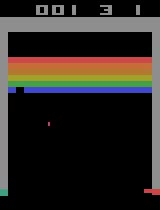

**Breakout-v0**
Maximize your score in the Atari 2600 game Breakout. In this environment, the observation is an RGB image of the screen, which is an array of shape (210, 160, 3) Each action is repeatedly performed for a duration of kk frames, where kk is uniformly sampled from \{2, 3, 4\}{2,3,4}.

https://gym.openai.com/envs/Breakout-v0/


### 2. Let's **mount Google drive** so that we can save files as we need.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import sys
import os

Mounted at /content/drive


### 1. Let's Install **stable-baselines3**.

In [ ]:
! pip install stable-baselines3[extra]

     |████████████████████████████████| 177 kB 4.3 MB/s 
     |████████████████████████████████| 1.5 MB 41.1 MB/s 
     |████████████████████████████████| 1.6 MB 30.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616824 sha256=0f8244cc5ed3fb9dab9117282f569736ae155b66f0ac16ed6d6b40218182c153
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441027 sha256=7bb805c6db25cad57b09cdd9be7a076fdaa3c980a6ff1a8186ecd1f96fdef826
  Stored in directory: /root/.cache/pip/wheels/87/67/2e/6147e7912fe37f5408b80d07527dab807c1d25f5c403a9538a
Successfully built gym AutoROM.accept-rom-license
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3



### 3. Let's install a few more things to setup RL enviroment. 

In [ ]:
# install required system dependencies
! apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
! pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

# Followings are for visualization (as we are running on server without a physical display!)
!pip install gym
!apt-get install -y xvfb python-opengl ffmpeg


# Autoreload in case that the custom modules are changed
%load_ext autoreload
%autoreload 2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 993 kB of archives.
After this operation, 2,982 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 993 kB in 2s (545 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:1

In [ ]:
# Followings are installing ROM files which allow us to play video games in the computer.
# The code downloads ROM files and imports them, which takes some time.
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/
! python -m atari_py.import_roms /content/ROM/

--2022-04-19 22:16:46--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19583716 (19M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  18.68M   261KB/s    in 77s     

2022-04-19 22:18:04 (249 KB/s) - ‘Roms.rar’ saved [19583716/19583716]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/128 in 1 Game Select ROM (Unknown) ~.bin          0%  OK 
Extracting  /content/ROM/2 in 1 - Chess, Othello (Atari) (Prototype).bin       0%  OK 
Extracting  /content/ROM/2 Pak Special - Cavern Blaster, City War (1992) (HES) (773-867) (PAL).bin       0%  OK 
Extracting  /content/ROM/2 Pak Special - Challenge, Surfing (1990) (HES) (771-333) (PAL).b

### 4.  And then, let's **import the libraries** (including stable-baselines3) we need to use.

In [ ]:
import gym
import torch

from stable_baselines3 import A2C, DQN, PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecExtractDictObs, VecMonitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import VecVideoRecorder
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.monitor import Monitor as TrainMonitor

### 5. We need a bunch of stuff for **visualization** (as we are running on server without a physical display!). Let's not worry about the details here.

In [ ]:
from gym.wrappers import Monitor as EvalMonitor
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import io
import base64
from IPython.display import HTML, clear_output
from IPython import display as ipythondisplay
from IPython.display import Image
from pyvirtualdisplay import Display

display = Display(visible=0, size=(400, 300))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

### 6. Here's our function for visualization of the result as a **video**.

In [ ]:
# Define some functions used for producing videos
def show_video(episode, rnd):
  mp4list = glob.glob('video/*.mp4')
  print(mp4list)
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env, episode, rnd):
  env = EvalMonitor(env, './video', force=True)
  return env

In [ ]:
def show_video(episode, rnd):
  mp4list = glob.glob(f'video_{episode}_{rnd}/*.mp4')
  print(mp4list)
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    os.system(f"ffmpeg -i {mp4} -vcodec libx264 video_{episode}_{rnd}/compressed.mp4")
    video = io.open(f'video_{episode}_{rnd}/compressed.mp4', 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

def wrap_env(env, episode, rnd):
    env = EvalMonitor(env, f'./video_{episode}_{rnd}', force=True)
    return env

Let's load our agent.

In [ ]:
filepath = "/content/drive/My Drive/Colab/EE488_Colab/Breakout/Agent/Breakout_0419_agen.zip"

model = A2C.load(filepath)

### 9. Now, let's **evaluate** the performance of the trained network (DQN)!

In [ ]:
import random

env_id = 'BreakoutNoFrameskip-v4'

#video_folder = /content/drive/My Drive/Colab/EE488_Colab/Breakout/videos/'
video_length = 10000
episode = 1
rnd = random.randint(0, 10000)
video_folder = f'video_{episode}_{rnd}/'
#video_folder = 'video/'

# Evaluate the agent
env = wrap_env(gym.make(env_id), episode, rnd)
env = make_atari_env(env_id, n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)
env = VecVideoRecorder(env, video_folder,
                       record_video_trigger=lambda x: x == 0, video_length=video_length,
                       name_prefix=f"A2C-agent-{rnd}")

obs = env.reset()
for _ in range(video_length):
    action, _states = model.predict(obs, deterministic=False)
    obs, rewards, dones, info = env.step(action)
    env.render(mode="rgb_array")
 
env.close()
show_video(episode, rnd)

['video_182_8129/compressed.mp4', 'video_182_8129/A2C-agent-8129-step-0-to-step-10000.mp4']


### **Congratulations**! You sucessfully tested an agent using stable-baselines3.

---
